El ejercicio consiste en analizar los datos de un request a la API de RandomUser.

Se tiene que obtener las edades y el género de los usuarios. Para luego hacer un gráfico de barras donde se pueda visualizar la edad máxima por género.

1. Imporar Librerías

In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt

2. Extraer data de usuarios

In [21]:
url = "https://randomuser.me/api/?results=30"
response = requests.get(url)

if response.status_code == 200:
  data = response.json()
else:
  print("Error: ", response.status_code)

In [22]:
users = data["results"]
users[0]

{'gender': 'female',
 'name': {'title': 'Miss', 'first': 'Elizabeth', 'last': 'Elliott'},
 'location': {'street': {'number': 3857, 'name': 'Grove Road'},
  'city': 'Bath',
  'state': 'Fife',
  'country': 'United Kingdom',
  'postcode': 'TA4M 4QE',
  'coordinates': {'latitude': '-9.8159', 'longitude': '161.5825'},
  'timezone': {'offset': '-8:00',
   'description': 'Pacific Time (US & Canada)'}},
 'email': 'elizabeth.elliott@example.com',
 'login': {'uuid': '53426406-26e0-48ca-8f32-cc05d2cfcf95',
  'username': 'blackpeacock784',
  'password': 'coffee',
  'salt': 'y6cIUPH0',
  'md5': '0fd4184a1d548d6548ad7d13191c2fa2',
  'sha1': '23d2ec988d95c2249b753debd41fd28272f149ed',
  'sha256': '41f53a0c7ba31ceeef5f87f2fd40515277790694eec5a487f095a4efec4e3c53'},
 'dob': {'date': '1947-05-17T20:01:49.188Z', 'age': 77},
 'registered': {'date': '2009-01-13T17:49:44.880Z', 'age': 15},
 'phone': '017683 94854',
 'cell': '07632 951463',
 'id': {'name': 'NINO', 'value': 'PN 21 80 95 F'},
 'picture': {'lar

3. Extraer género y edad de los usuarios

In [23]:
genders = [user["gender"] for user in users]
genders

['female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'male',
 'male',
 'female',
 'female',
 'female',
 'male',
 'female',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'female']

In [38]:
ages = [user["dob"]["age"] for user in users]
ages

[77,
 30,
 63,
 64,
 41,
 58,
 78,
 31,
 50,
 25,
 43,
 74,
 75,
 47,
 60,
 29,
 45,
 52,
 26,
 39,
 44,
 76,
 56,
 29,
 35,
 46,
 63,
 72,
 75,
 33]

4. Crear matriz de datos (género, edad)

In [41]:
data_matrix = np.array([genders, ages])
data_matrix

array([['female', 'female', 'female', 'female', 'female', 'female',
        'male', 'male', 'male', 'male', 'male', 'female', 'female',
        'female', 'male', 'male', 'female', 'female', 'female', 'male',
        'female', 'male', 'female', 'male', 'male', 'male', 'male',
        'female', 'male', 'female'],
       ['77', '30', '63', '64', '41', '58', '78', '31', '50', '25', '43',
        '74', '75', '47', '60', '29', '45', '52', '26', '39', '44', '76',
        '56', '29', '35', '46', '63', '72', '75', '33']], dtype='<U21')

In [26]:
data_matrix = data_matrix.T
data_matrix

array([['female', '77'],
       ['female', '30'],
       ['female', '63'],
       ['female', '64'],
       ['female', '41'],
       ['female', '58'],
       ['male', '78'],
       ['male', '31'],
       ['male', '50'],
       ['male', '25'],
       ['male', '43'],
       ['female', '74'],
       ['female', '75'],
       ['female', '47'],
       ['male', '60'],
       ['male', '29'],
       ['female', '45'],
       ['female', '52'],
       ['female', '26'],
       ['male', '39'],
       ['female', '44'],
       ['male', '76'],
       ['female', '56'],
       ['male', '29'],
       ['male', '35'],
       ['male', '46'],
       ['male', '63'],
       ['female', '72'],
       ['male', '75'],
       ['female', '33']], dtype='<U21')

5. Hacer un gráfico de barras que muestre la edad máxima por género.

In [27]:
ages_men = []
ages_women = []

for row in data_matrix:
  gender = row[0]
  age = int(row[1])
  if gender == "male":
    ages_men.append(age)
  elif gender == "female":
    ages_women.append(age)

In [28]:
ages_men

[78, 31, 50, 25, 43, 60, 29, 39, 76, 29, 35, 46, 63, 75]

In [29]:
ages_women

[77, 30, 63, 64, 41, 58, 74, 75, 47, 45, 52, 26, 44, 56, 72, 33]

In [33]:
labels = ["Hombres", "Mujeres"]
max_ages = [np.max(ages_men), np.max(ages_women)]

print(labels, max_ages)

['Hombres', 'Mujeres'] [78, 77]


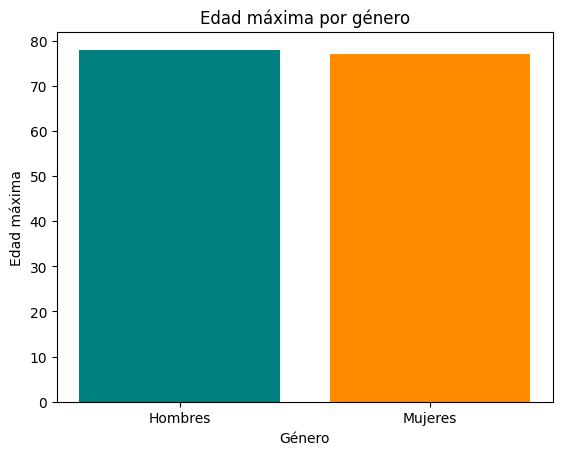

In [37]:
plt.bar(labels, max_ages, color=["teal", "darkorange"])
plt.title("Edad máxima por género")
plt.xlabel("Género")
plt.ylabel("Edad máxima")
plt.show()